Classify the K-Nearest Neighbours and Support Vector Machine for classification.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Loading dataset...")
data = pd.read_csv("emails.csv")   # Make sure emails.csv is in same folder

print("Shape:", data.shape)
print("Columns:", len(data.columns))

Loading dataset...
Shape: (4861, 3002)
Columns: 3002


In [ ]:
sample_data = data.sample(n=800, random_state=42)

In [ ]:
X = sample_data.drop(columns=["Email No.", "Prediction"])
y = sample_data["Prediction"]


In [ ]:
# Impute missing values with the mean
X = X.fillna(X.mean())

pca = PCA(n_components=30, random_state=42)
X_reduced = pca.fit_transform(X)

In [ ]:
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
print("Training samples:", len(X_train), "Testing samples:", len(X_test))


Training samples: 640 Testing samples: 160


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\n🔹 Training K-Nearest Neighbors (KNN)...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("✅ KNN Accuracy:", round(knn_acc, 4))


🔹 Training K-Nearest Neighbors (KNN)...
✅ KNN Accuracy: 0.8063


In [ ]:
print("\n🔹 Training Support Vector Machine (SVM)...")
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("✅ SVM Accuracy:", round(svm_acc, 4))


🔹 Training Support Vector Machine (SVM)...
✅ SVM Accuracy: 0.8313


In [ ]:
# ----------------------------------------------
print("\n📘 KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n📗 SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


📘 KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       109
         1.0       0.74      0.61      0.67        51

    accuracy                           0.81       160
   macro avg       0.78      0.75      0.77       160
weighted avg       0.80      0.81      0.80       160


📗 SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       109
         1.0       0.93      0.51      0.66        51

    accuracy                           0.83       160
   macro avg       0.87      0.75      0.77       160
weighted avg       0.85      0.83      0.81       160



In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'KNN Confusion Matrix')

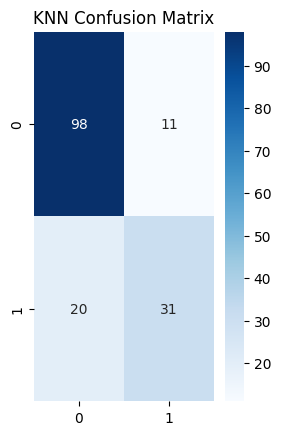

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")

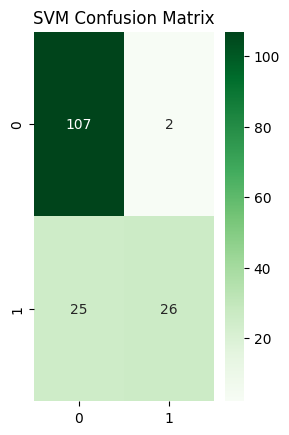

In [ ]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Greens", fmt="d")
plt.title("SVM Confusion Matrix")

plt.show()

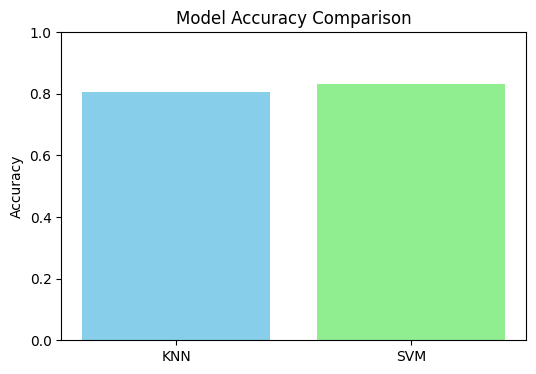

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(["KNN", "SVM"], [knn_acc, svm_acc], color=["skyblue", "lightgreen"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [ ]:
print(f"KNN Accuracy: {knn_acc*100:.2f}%")
print(f"SVM Accuracy: {svm_acc*100:.2f}%")

KNN Accuracy: 80.62%
SVM Accuracy: 83.12%
